# Dimensionality Reduction

### Unsupervised Learning: Principal Component Analysis (PCA)

Principal component analysis is a dimensionality reduction algorithm that we can use to find structure in our data.The main aim is to find surface onto which projection errros are minimized.This surface is a lower the dimensional subspace spanned by principal components of the data. These principal components are the direction along which the projection of the data onto that axis hae the maximum variance.The main component along which the data varies is called the principal axis of variation.


### Intuitive interpretation of PCA

At the first step we plot a data an with 2 dimenstion and try to reduce it to one 

![](images/PCA/pca_two.png)

![](images/PCA/source.gif)

### ** Don't mistake ** 
**PCA is different from linear regression**

![](images/PCA/pcaVSlreg.png)

### How about If we have three-dimensional





![](images/PCA/3d/3d_data.jpg)
![](images/PCA/3d/3d_data_pca_axis.jpg)
![](images/PCA/3d/3d_data_pca.jpg)



## Using PCA in Sklearn 



In [26]:
import sklearn 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import loader as support
from sklearn.model_selection import train_test_split

In [27]:
import gzip, pickle, sys 
f = gzip.open('Datasets/mnist.pkl.gz', 'rb')
(input_train, output_train), (input_test, output_test), _ = pickle.load(f, encoding='bytes')

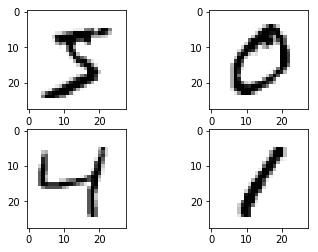

In [28]:

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(input_train[i].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
randomforest = RandomForestClassifier(n_estimators=30)

In [31]:
randomforest.fit(input_train,output_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(output_test, randomforest.predict(input_test)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       991
          1       0.98      0.99      0.98      1064
          2       0.95      0.97      0.96       990
          3       0.96      0.97      0.96      1030
          4       0.97      0.98      0.97       983
          5       0.97      0.94      0.95       915
          6       0.98      0.99      0.98       967
          7       0.98      0.97      0.97      1090
          8       0.95      0.95      0.95      1009
          9       0.95      0.94      0.95       961

avg / total       0.97      0.97      0.97     10000



In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components= 500)
pca.fit(input_train)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

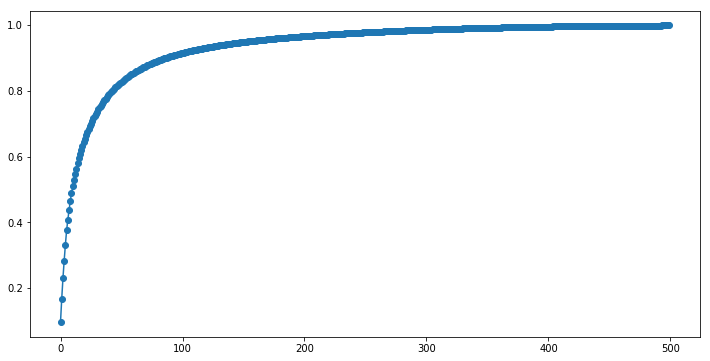

In [35]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:500]),marker = 'o')
plt.show()

In [36]:
np.cumsum(pca.explained_variance_ratio_[0:500])[200]

0.96679795

In [43]:
pca = PCA(n_components= 200)
pca.fit(input_train)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
x_train = pca.transform(input_train)
x_test = pca.transform(input_test)

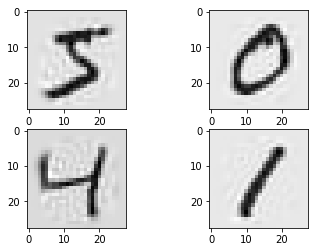

In [45]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(pca.inverse_transform(x_train)[i].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest' )
plt.show()

In [46]:
randomforest = RandomForestClassifier(n_estimators=30)

In [47]:
randomforest.fit(x_train,outpsut_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(output_test, randomforest.predict(x_test)))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96       991
          1       0.98      0.98      0.98      1064
          2       0.92      0.94      0.93       990
          3       0.89      0.92      0.91      1030
          4       0.91      0.94      0.92       983
          5       0.92      0.88      0.90       915
          6       0.95      0.98      0.97       967
          7       0.96      0.95      0.95      1090
          8       0.92      0.88      0.90      1009
          9       0.93      0.89      0.91       961

avg / total       0.93      0.93      0.93     10000

